In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
works = pd.read_csv('ekoniva-dataset/works_new.csv')
fields = pd.read_csv('ekoniva-dataset/fields_new.csv')
value = pd.read_csv('ekoniva-dataset/value_new.csv')

In [3]:
fields['crop'].isna().sum()

np.int64(0)

In [22]:
works['work_type'].value_counts()

work_type
Уборка                59097
Обработка почвы       54129
Внесение СЗР          26460
Сев                   18081
Внесение удобрений    16916
Name: count, dtype: int64

In [4]:
works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174683 entries, 0 to 174682
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   season         174683 non-null  int64  
 1   field          174683 non-null  object 
 2   work_type      174683 non-null  object 
 3   work_subtype   174683 non-null  object 
 4   start_date     174683 non-null  object 
 5   end_date       165679 non-null  object 
 6   area           174683 non-null  float64
 7   main_tech      174683 non-null  object 
 8   add_tech       126143 non-null  object 
 9   mech           174683 non-null  object 
 10  proc_depth     42121 non-null   float64
 11  prod_purpose   33861 non-null   object 
 12  prod_weight    174683 non-null  float64
 13  Unnamed: 13    164174 non-null  float64
 14  Unnamed: 14    164174 non-null  float64
 15  prod_dry_perc  12968 non-null   float64
 16  prod_humid     23555 non-null   float64
 17  prod_impur     23555 non-null

In [5]:
df1 = works.merge(fields, 'left', on=['field', 'season'])
df = df1.merge(value, "left", on=["field", "work_id"])
df = df.drop(columns=['Unnamed: 13', 'yield_fact'])
df = df.rename(columns={
    'area_x': 'completed_work_area',
    'area_y': 'field_area',
    'Unnamed: 14': 'yield_fact'
})

df['season'] = abs(df['season'] - 2023)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228636 entries, 0 to 228635
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   season               228636 non-null  int64  
 1   field                228636 non-null  object 
 2   work_type            228636 non-null  object 
 3   work_subtype         228636 non-null  object 
 4   start_date           228636 non-null  object 
 5   end_date             217100 non-null  object 
 6   completed_work_area  228636 non-null  float64
 7   main_tech            228636 non-null  object 
 8   add_tech             150610 non-null  object 
 9   mech                 228636 non-null  object 
 10  proc_depth           42139 non-null   float64
 11  prod_purpose         33861 non-null   object 
 12  prod_weight          228636 non-null  float64
 13  yield_fact           215236 non-null  float64
 14  prod_dry_perc        12968 non-null   float64
 15  prod_humid       

In [6]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

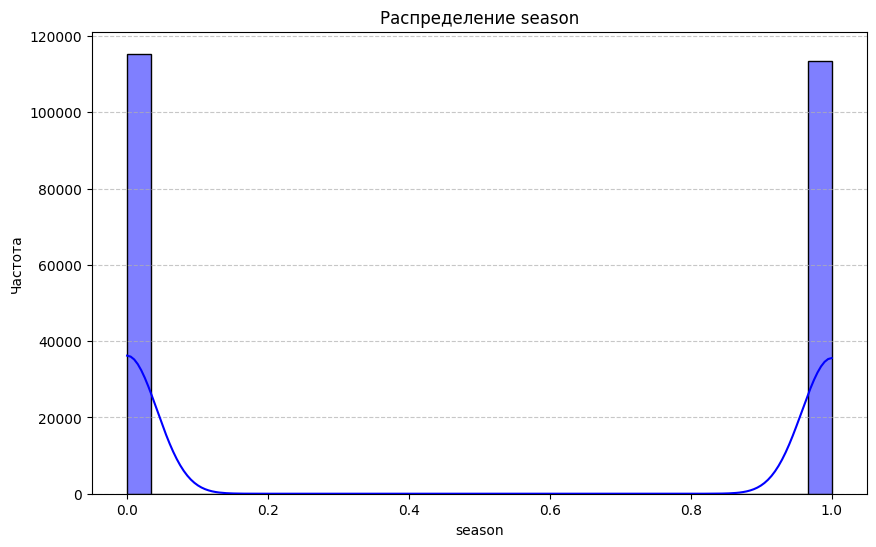

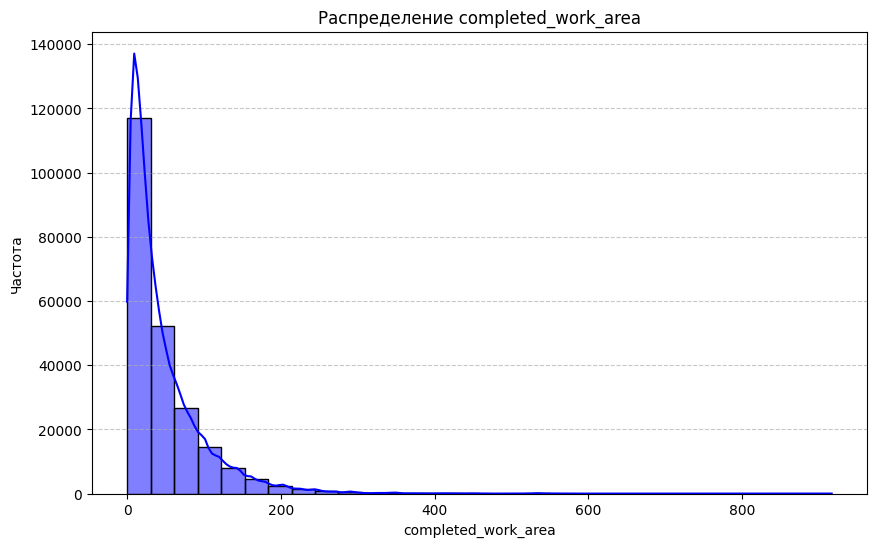

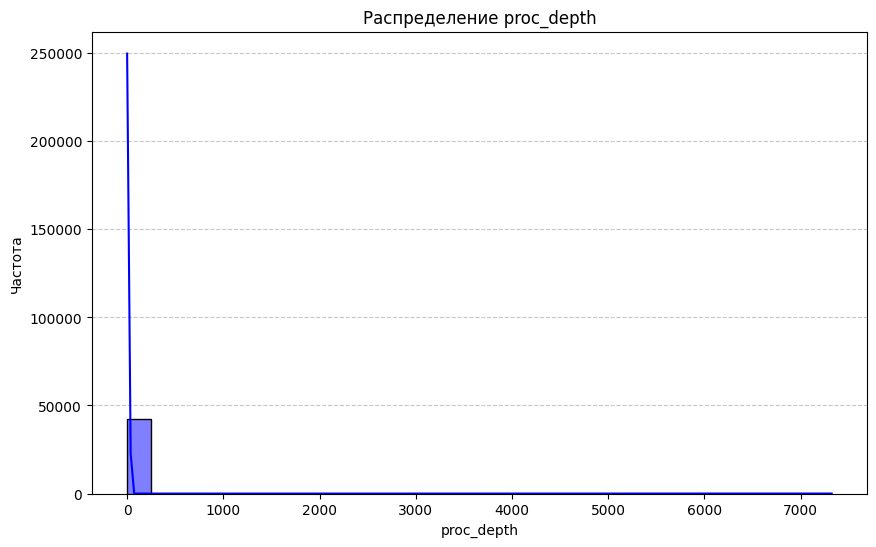

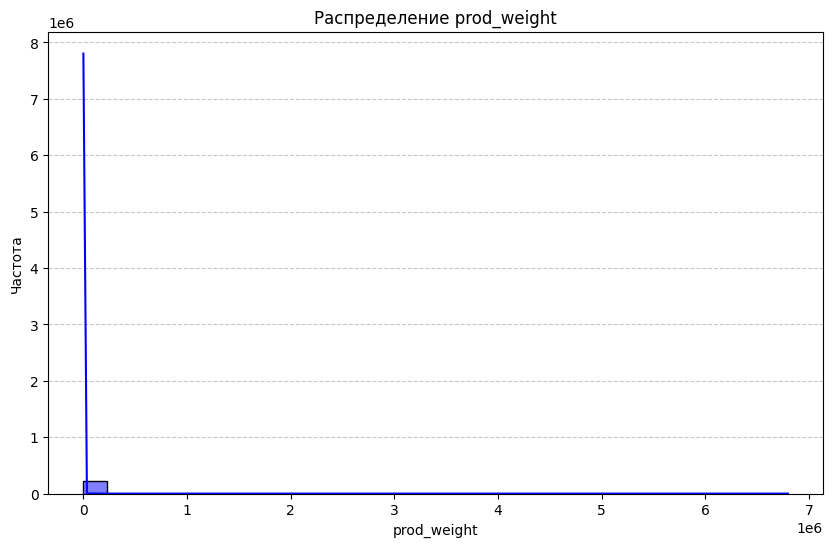

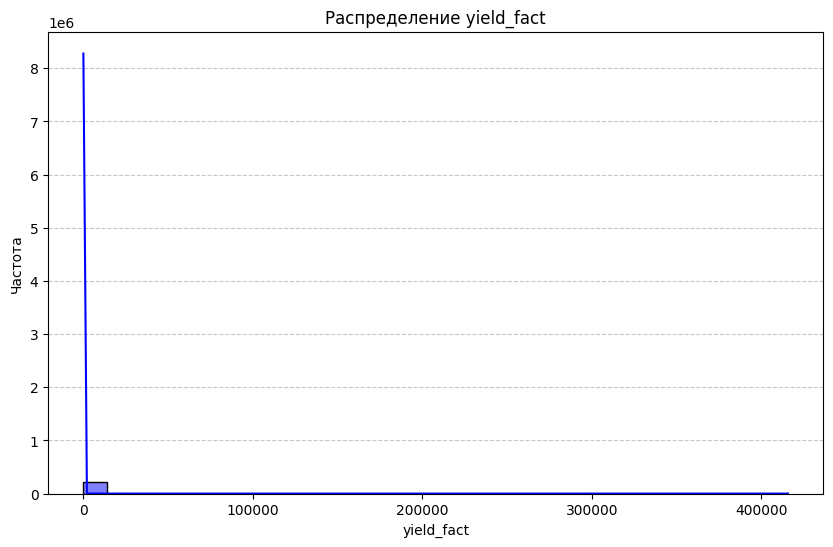

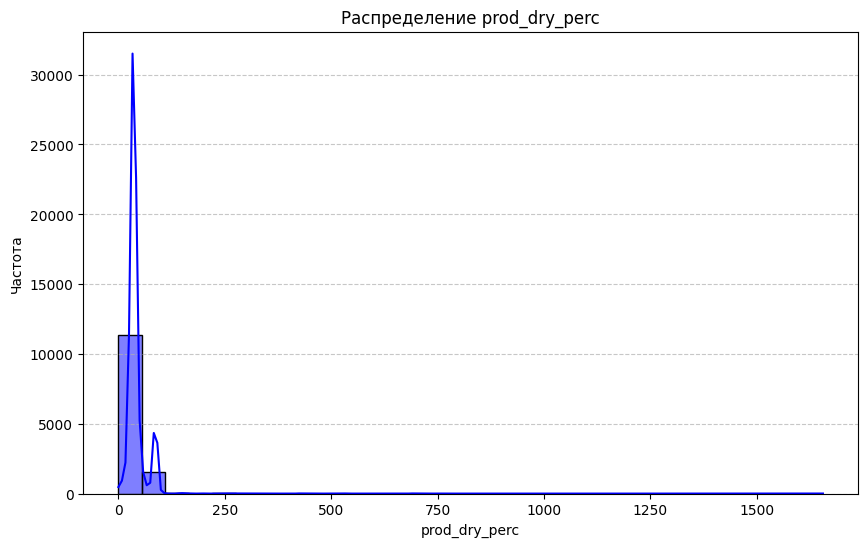

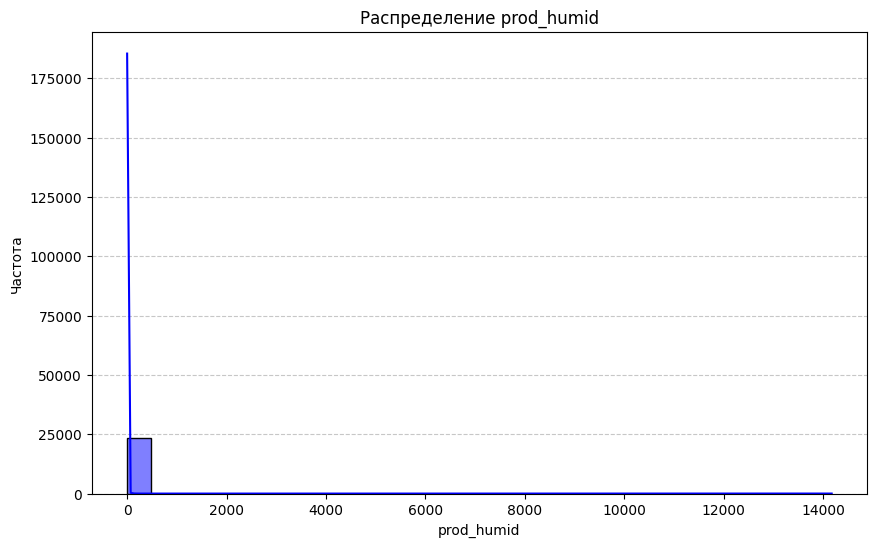

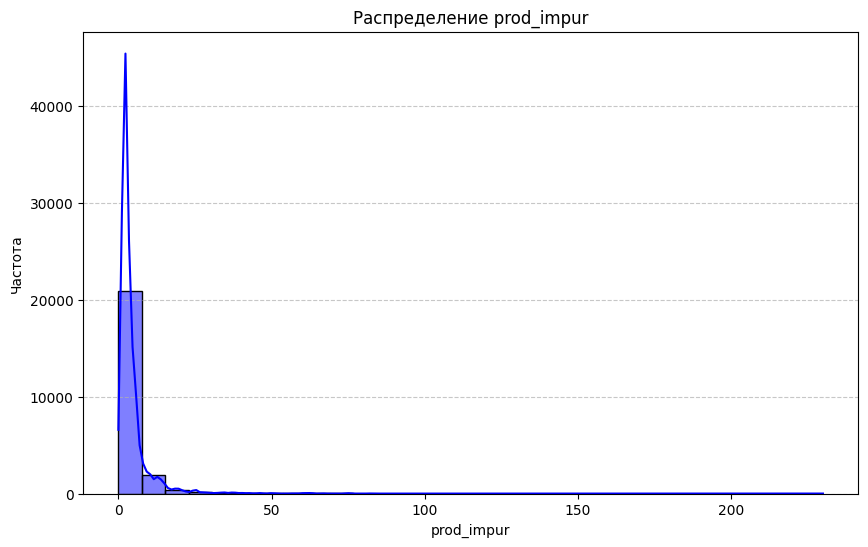

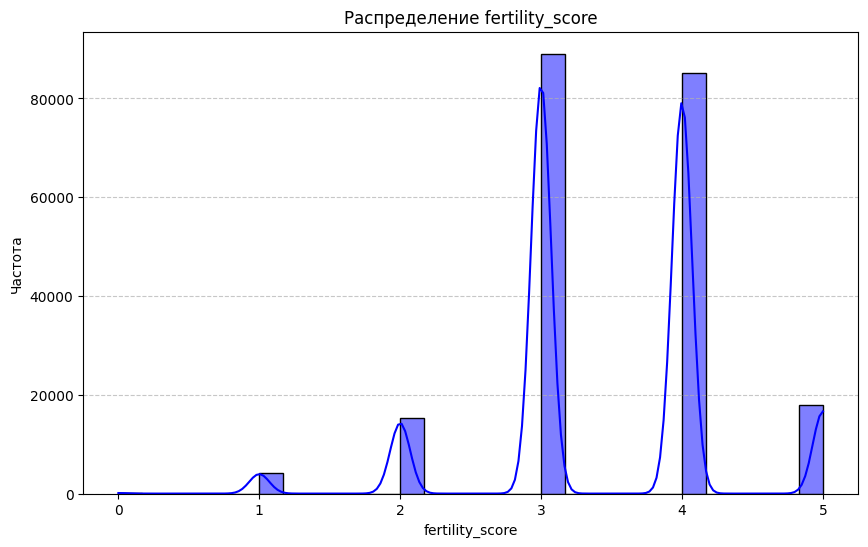

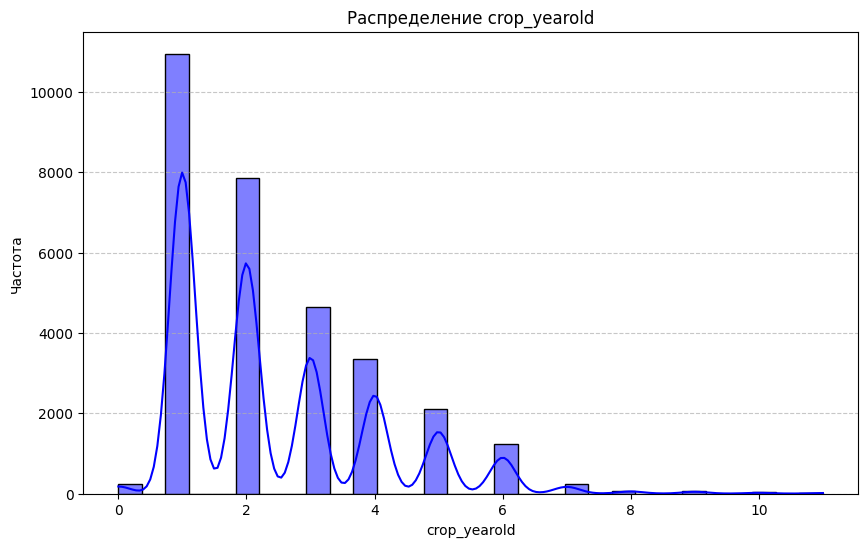

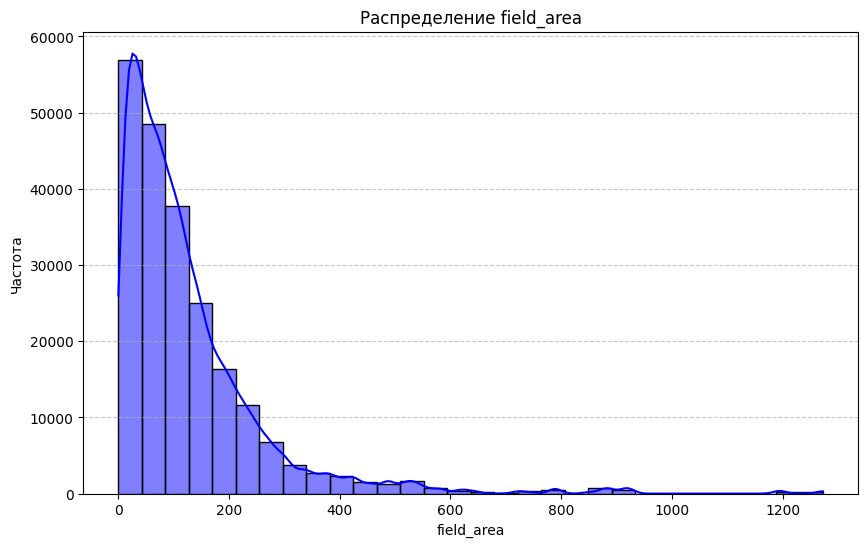

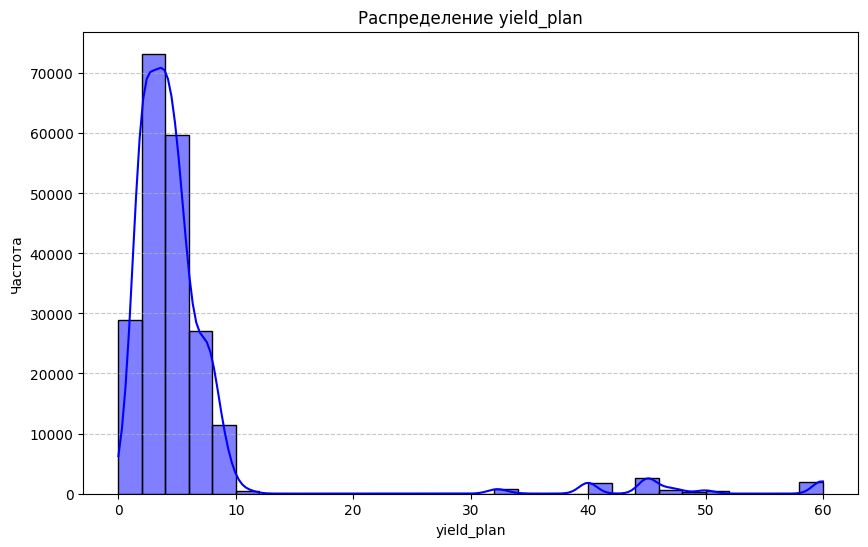

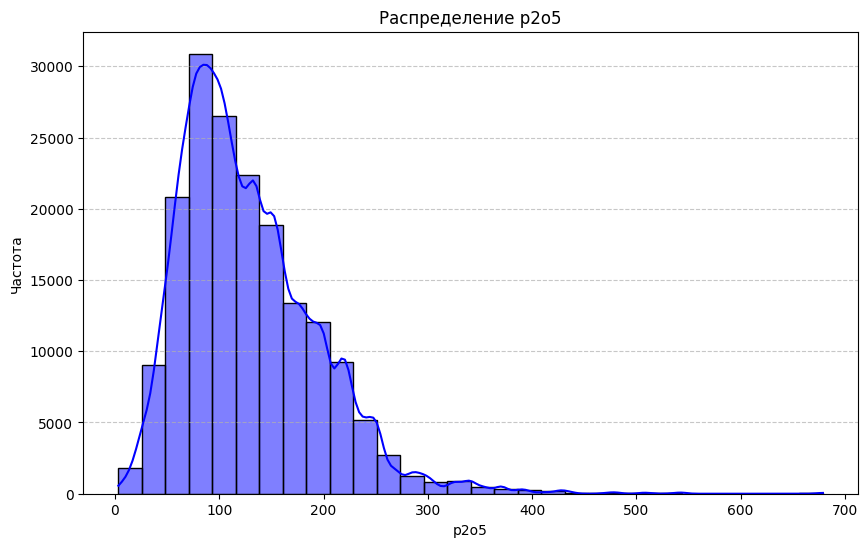

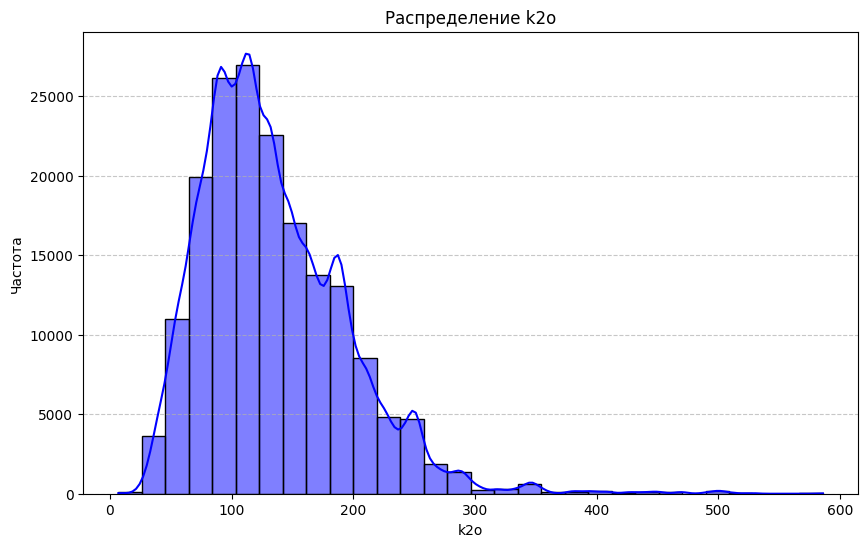

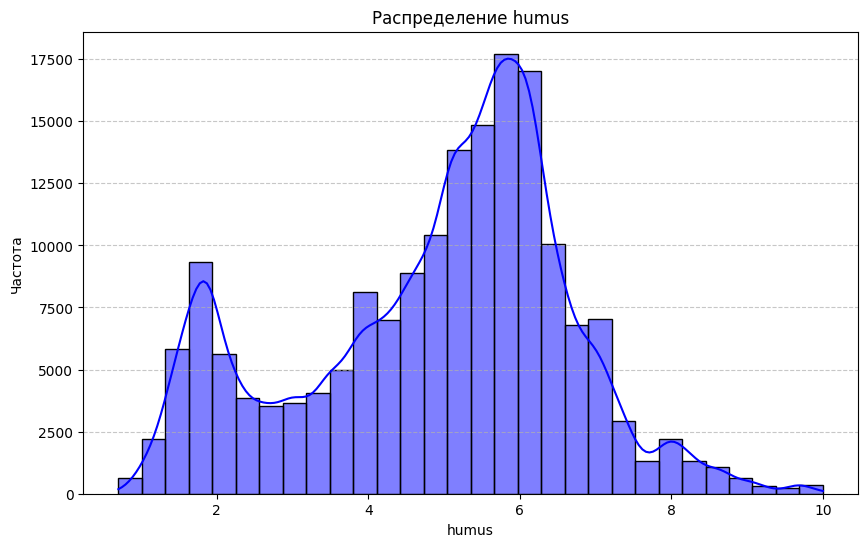

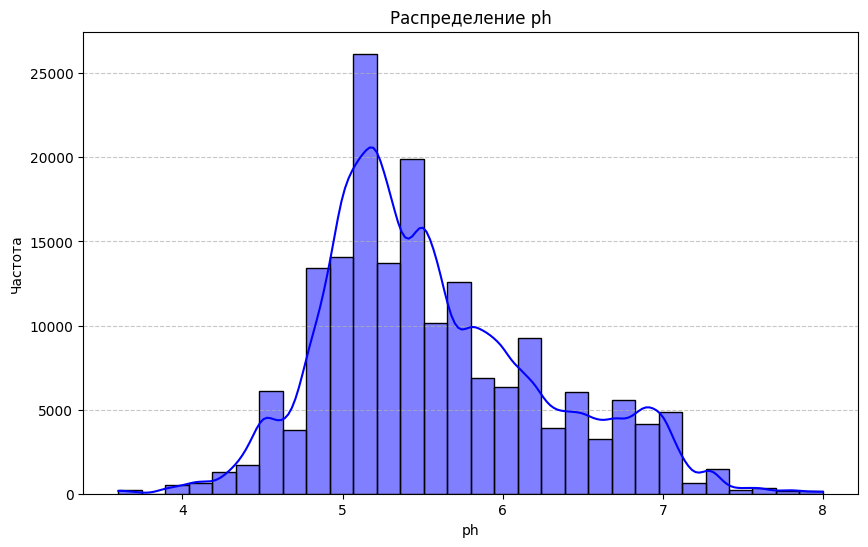

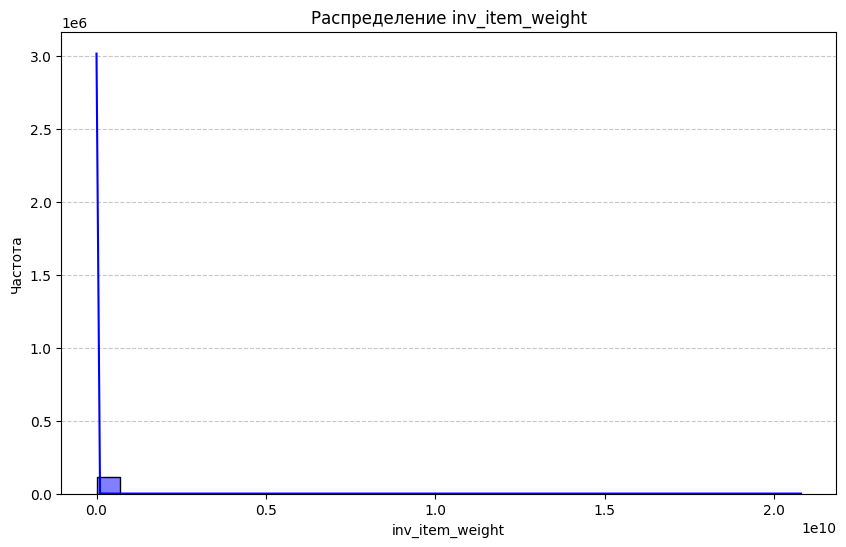

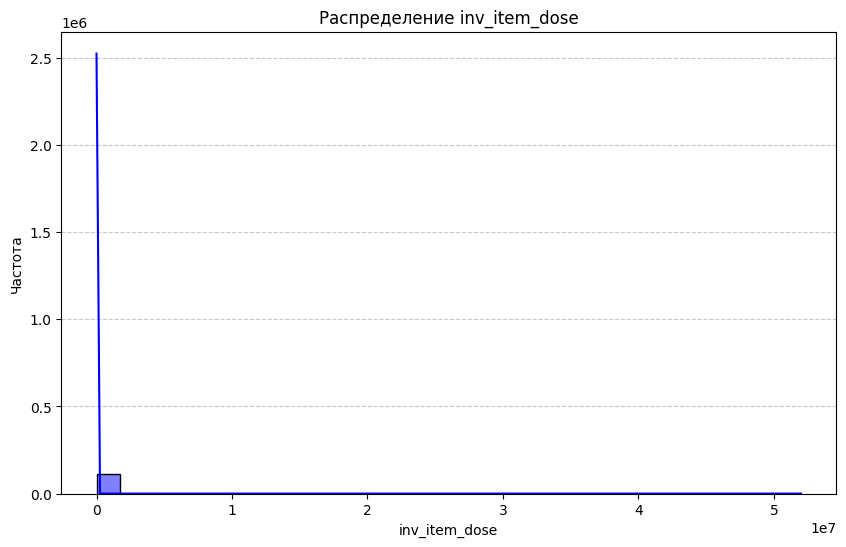

In [7]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), kde=True, color='blue', bins=30, edgecolor='black')
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [8]:
df = remove_outliers_iqr(df, 'crop_yearold')
df = remove_outliers_iqr(df, 'field_area')
df = remove_outliers_iqr(df, 'yield_plan')

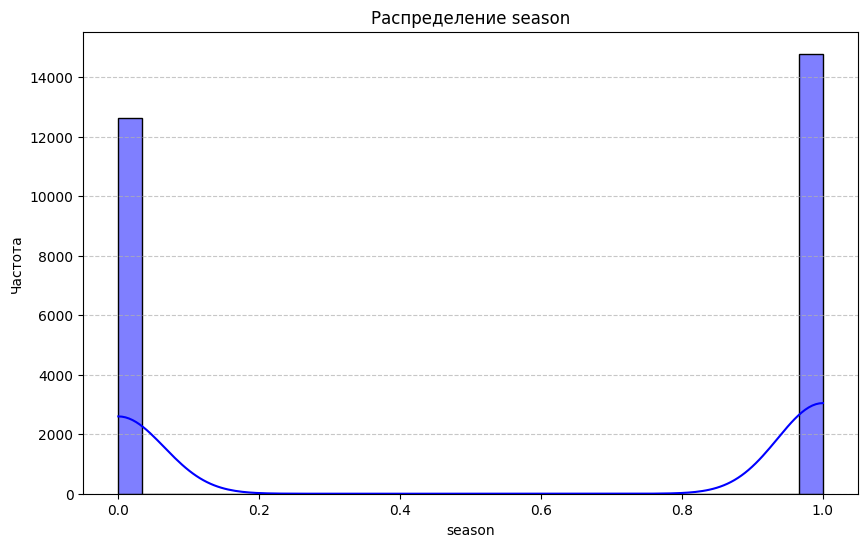

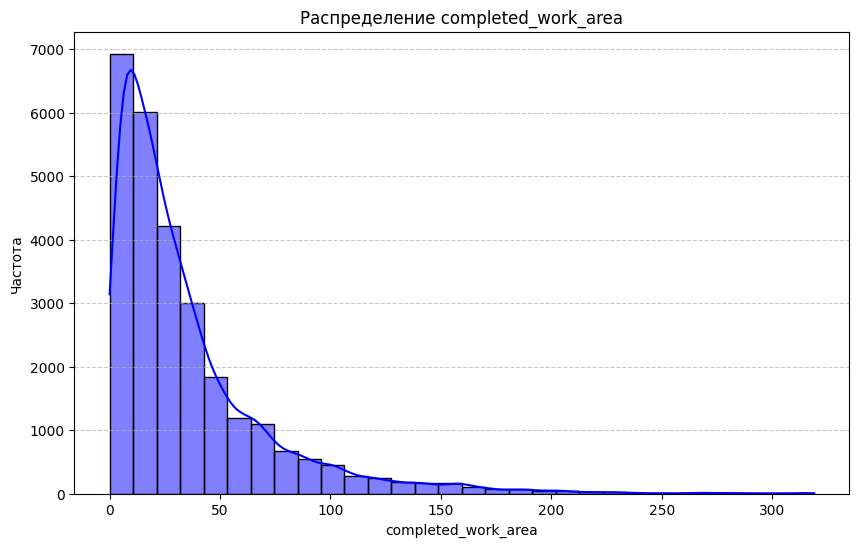

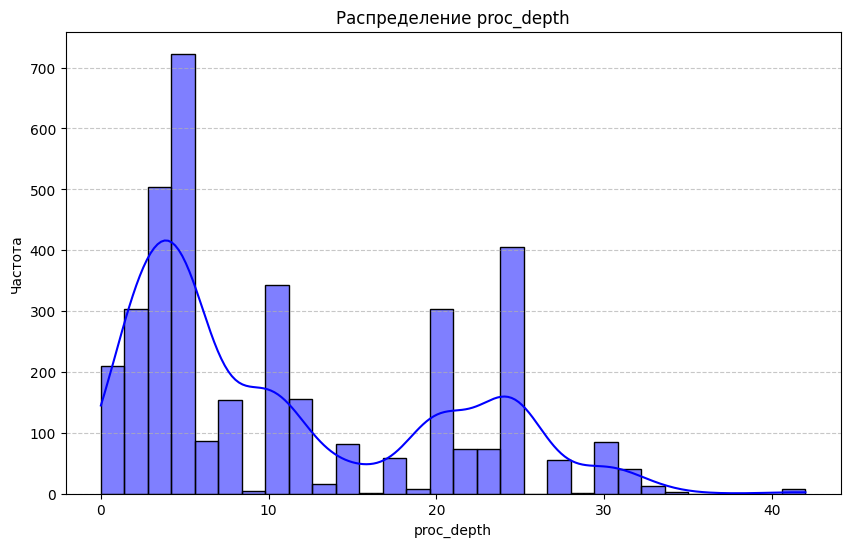

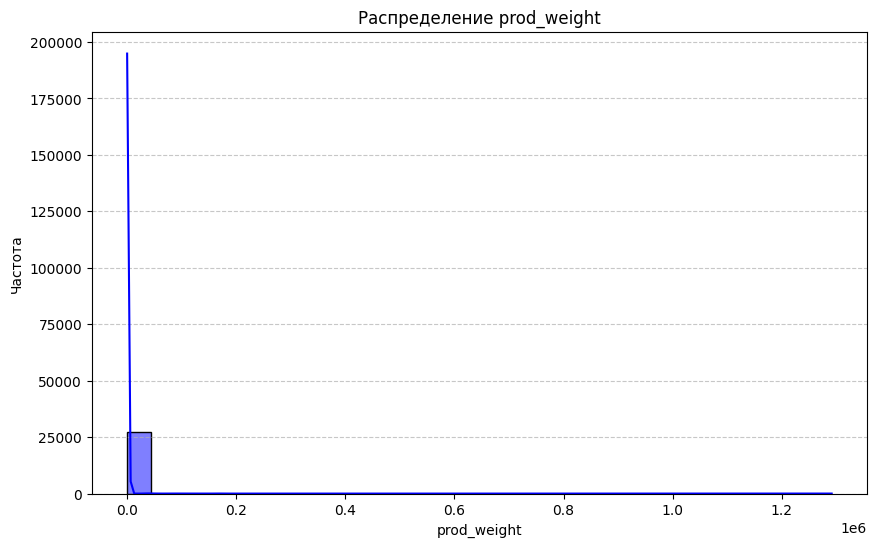

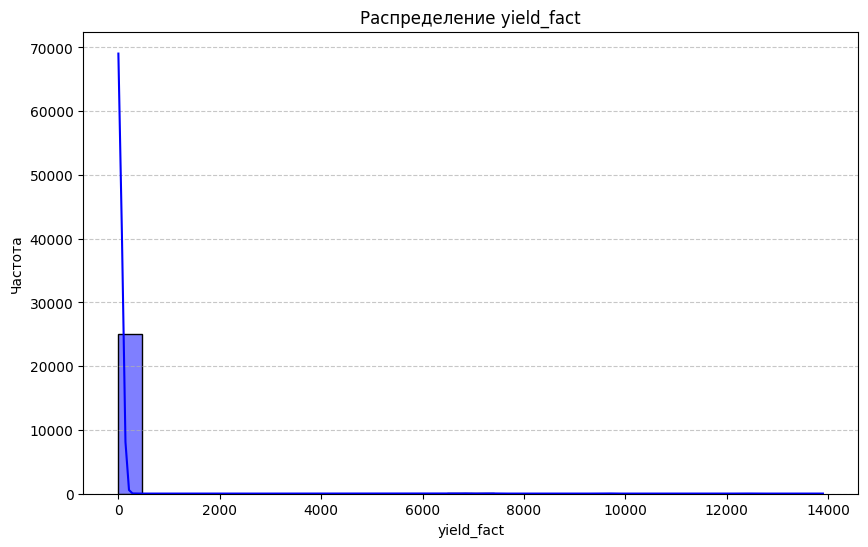

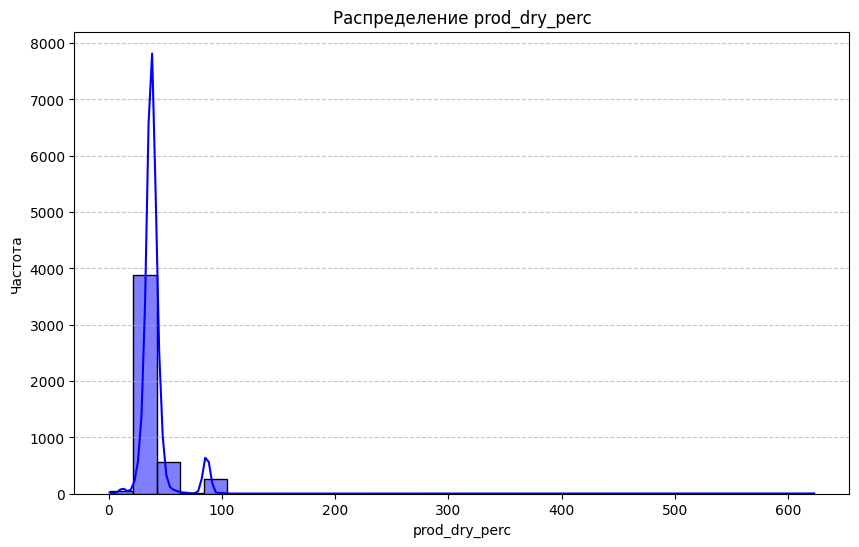

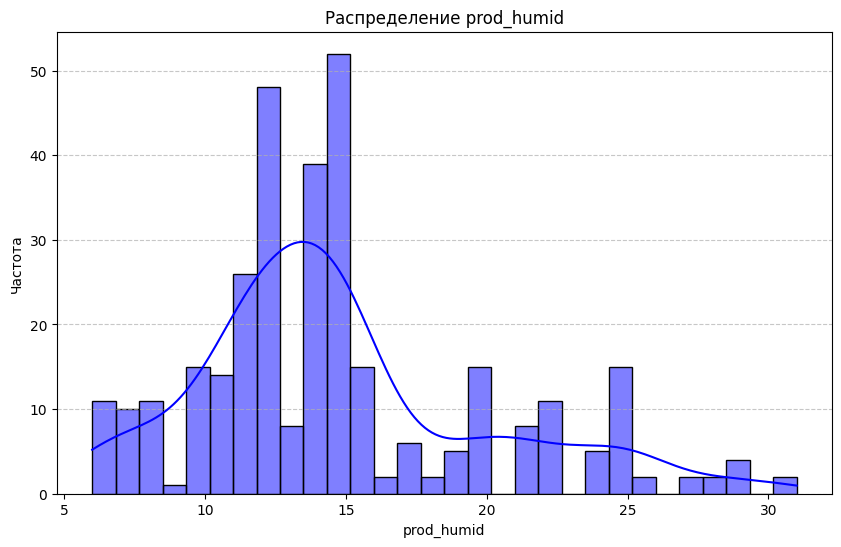

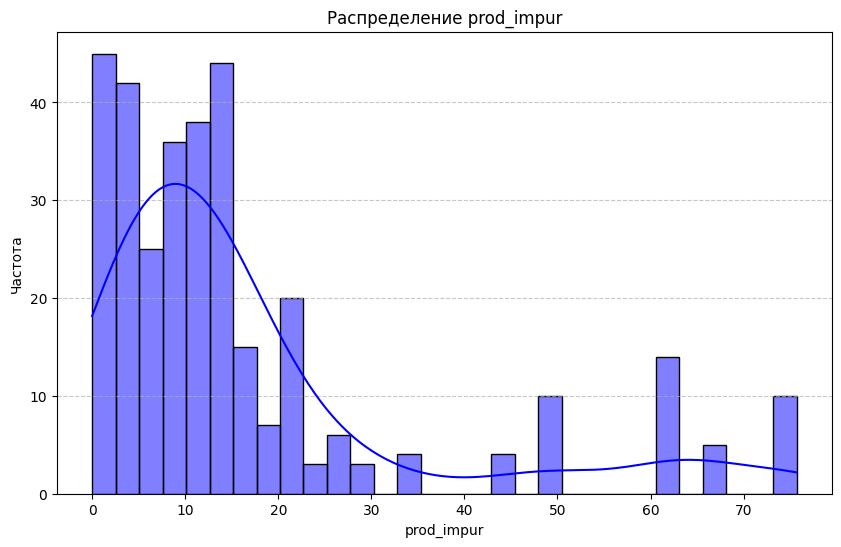

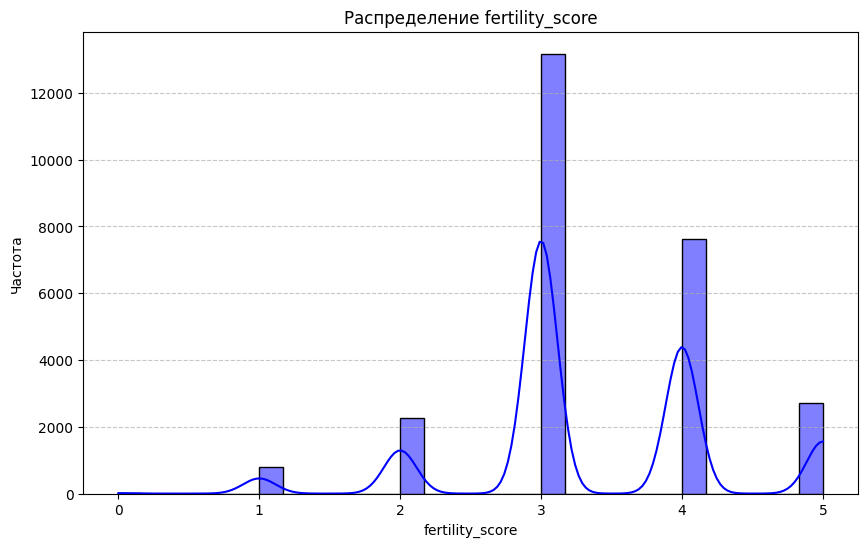

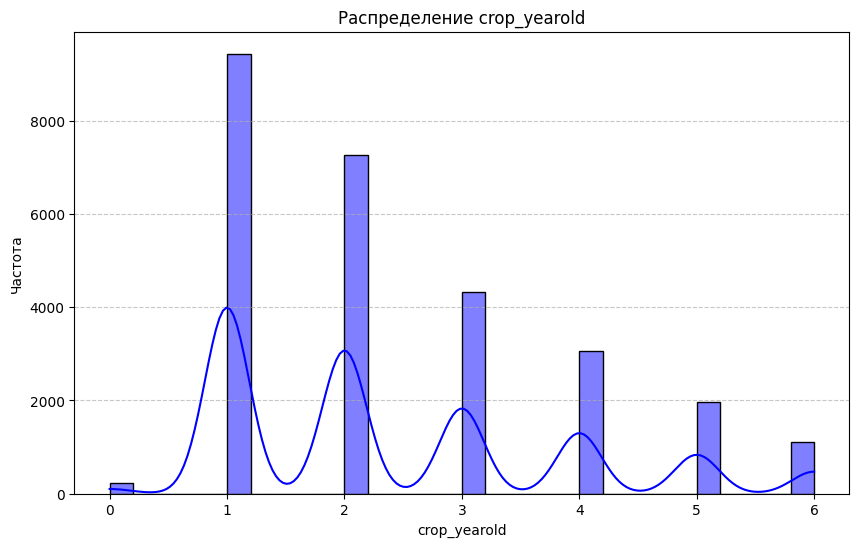

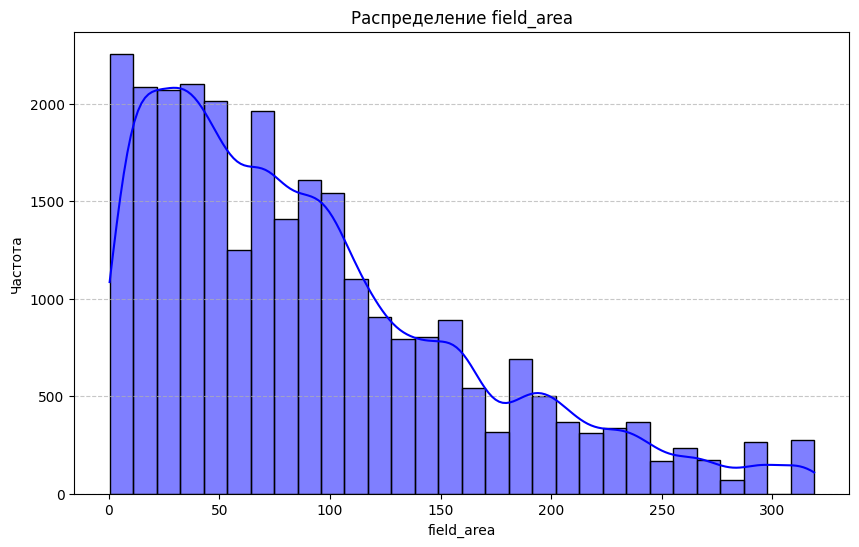

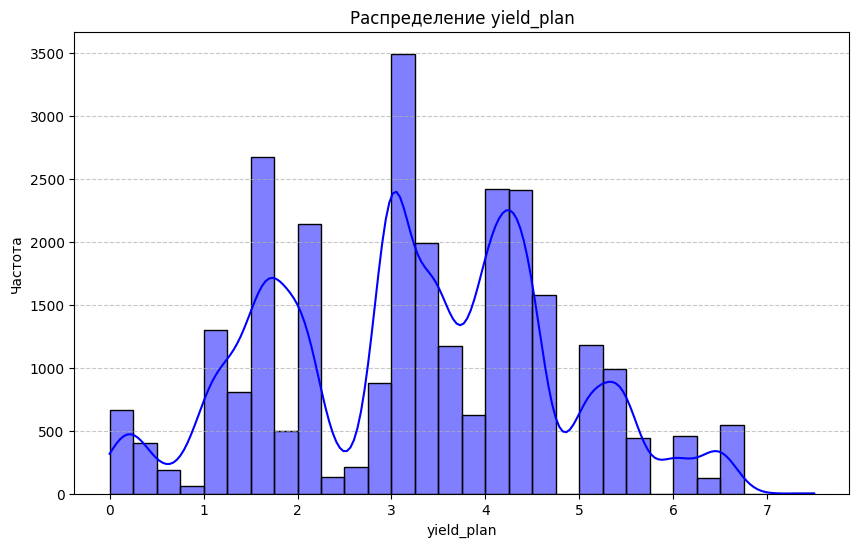

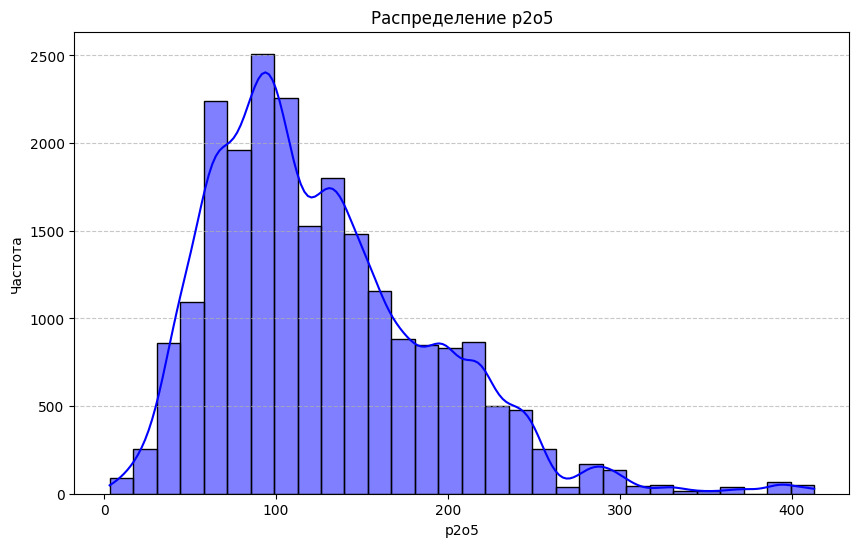

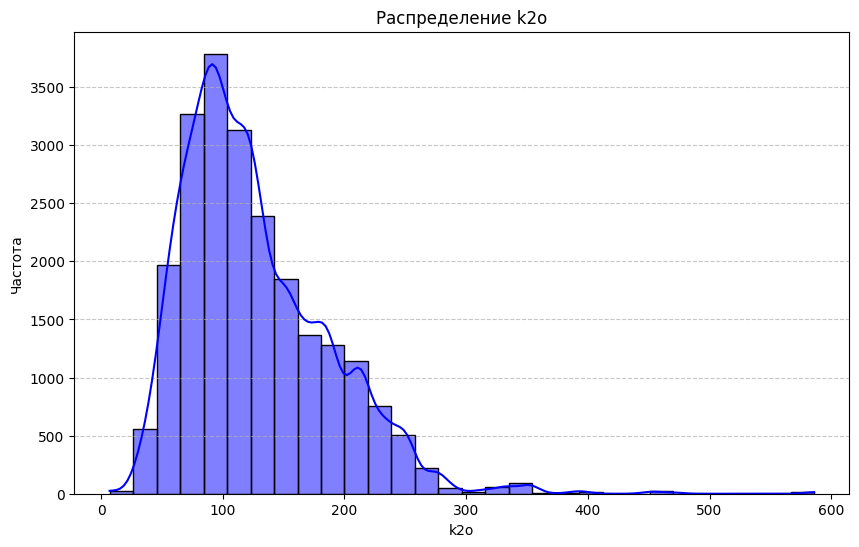

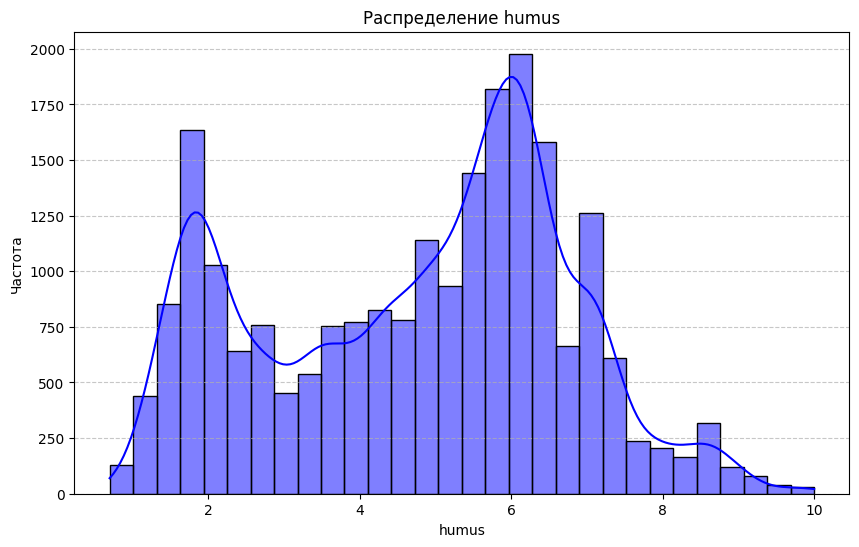

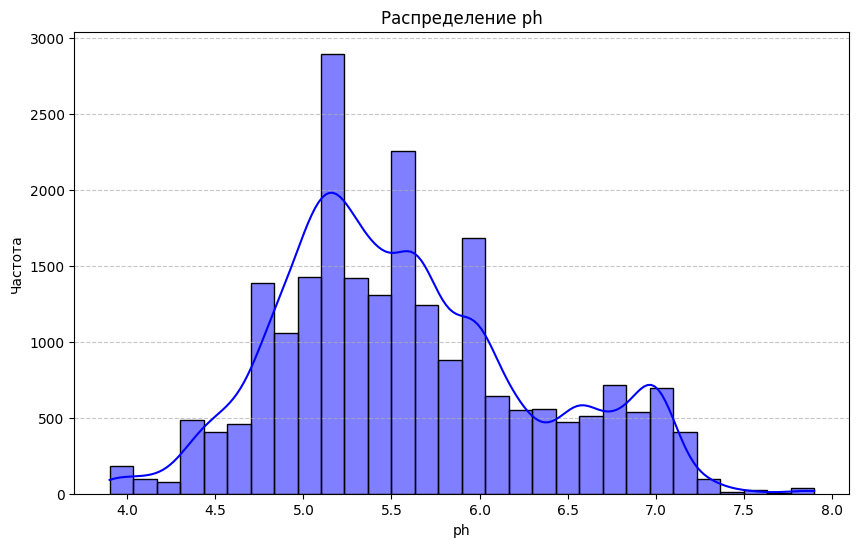

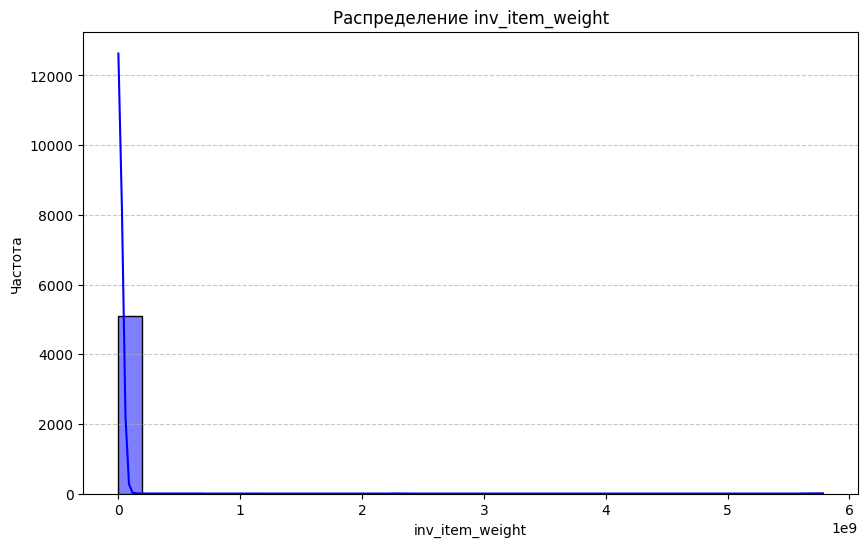

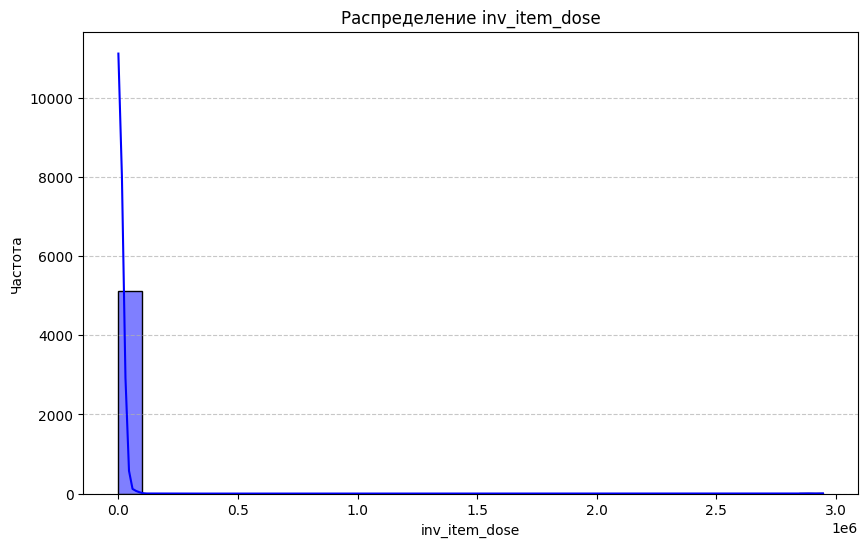

In [9]:
 numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), kde=True, color='blue', bins=30, edgecolor='black')
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [10]:
df['prod_weight'].unique().shape

(3204,)

In [11]:
target_encoding = df.groupby('crop')['yield_fact'].transform('mean')*(100-df.groupby('crop')['prod_impur'].transform('mean'))
df['plant_type_encoded'] = target_encoding

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27407 entries, 440 to 228635
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               27407 non-null  int64  
 1   field                27407 non-null  object 
 2   work_type            27407 non-null  object 
 3   work_subtype         27407 non-null  object 
 4   start_date           27407 non-null  object 
 5   end_date             26035 non-null  object 
 6   completed_work_area  27407 non-null  float64
 7   main_tech            27407 non-null  object 
 8   add_tech             18962 non-null  object 
 9   mech                 27407 non-null  object 
 10  proc_depth           3704 non-null   float64
 11  prod_purpose         4976 non-null   object 
 12  prod_weight          27407 non-null  float64
 13  yield_fact           25133 non-null  float64
 14  prod_dry_perc        4741 non-null   float64
 15  prod_humid           331 non-null    f

In [13]:
df['crop'].isna().sum()

np.int64(0)

In [14]:
df['plant_type_encoded']

440       12.796734
441       12.796734
624       72.935273
647       72.935273
648       72.935273
            ...    
228612          NaN
228613          NaN
228630          NaN
228631          NaN
228635          NaN
Name: plant_type_encoded, Length: 27407, dtype: float64

In [15]:
unique_works_for_mech = df.groupby('mech')['work_type'].nunique().reset_index()
unique_works_for_mech.rename(columns={'work_type': 'unique_works_for_mech'}, inplace=True)

amount_of_mech = df.groupby('mech').size().reset_index()
amount_of_mech.rename(columns={0: 'amount_of_mech'}, inplace=True)

merged_df = pd.merge(df, unique_works_for_mech, on='mech')
merged_df = pd.merge(merged_df, amount_of_mech, on='mech')

merged_df['unique_works_for_mech_product'] = merged_df['unique_works_for_mech'] * merged_df['amount_of_mech']

yield_fact_sum_by_field = df.groupby('field')['yield_fact'].sum().reset_index()
yield_fact_sum_by_field.rename(columns={'yield_fact': 'yield_fact_sum'}, inplace=True)

merged_df = pd.merge(merged_df, yield_fact_sum_by_field, on='field')

merged_df['unique_works_for_mech_product'] = merged_df['unique_works_for_mech'] / merged_df['amount_of_mech']
new_df = merged_df[['plant_type_encoded', 'yield_plan', 'yield_fact', 'completed_work_area', 'region', 
                    'unique_works_for_mech', 'amount_of_mech', 'unique_works_for_mech_product']]

df = new_df[(new_df['yield_fact'] > 0)]
mean_values = df.mean(numeric_only=True)
df = df.fillna(mean_values)
print(df)
print(new_df[new_df['yield_fact'] > 0].isna().sum())

       plant_type_encoded  yield_plan  yield_fact  completed_work_area  \
94               8.514345        0.09    0.294875                24.00   
95               8.514345        0.09    0.294875                24.00   
2503            57.272953        5.50    4.383793                20.30   
2962            57.272953        4.50    6.207508                 9.99   
3163            57.272953        5.50    5.976689               117.50   
...                   ...         ...         ...                  ...   
27397           57.272953        4.10    1.958250                20.00   
27399           57.272953        4.10    1.421811                17.01   
27401           57.272953        4.10    3.403750                28.00   
27404           57.272953        4.10    2.884259                27.00   
27406           57.272953        1.60    3.611727                73.93   

            region  unique_works_for_mech  amount_of_mech  \
94     Новосибирск                      1         

In [16]:
numeric_columns = ['yield_plan', 'yield_fact', 'completed_work_area', 
                   'unique_works_for_mech', 'amount_of_mech', 'unique_works_for_mech_product', 'plant_type_encoded']
numeric_means = df[numeric_columns].mean()
df[numeric_columns] = df[numeric_columns].fillna(numeric_means)

categorical_columns = ['region']
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [17]:
df.isna().sum()

plant_type_encoded               0
yield_plan                       0
yield_fact                       0
completed_work_area              0
region                           0
unique_works_for_mech            0
amount_of_mech                   0
unique_works_for_mech_product    0
dtype: int64

In [18]:
df = pd.get_dummies(df, columns=['region'], prefix='region').reset_index()

In [19]:
df = df.drop(columns=['index'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4887 entries, 0 to 4886
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   plant_type_encoded             4887 non-null   float64
 1   yield_plan                     4887 non-null   float64
 2   yield_fact                     4887 non-null   float64
 3   completed_work_area            4887 non-null   float64
 4   unique_works_for_mech          4887 non-null   int64  
 5   amount_of_mech                 4887 non-null   int64  
 6   unique_works_for_mech_product  4887 non-null   float64
 7   region_Алтай                   4887 non-null   bool   
 8   region_Башкирия                4887 non-null   bool   
 9   region_Воронеж                 4887 non-null   bool   
 10  region_Калуга                  4887 non-null   bool   
 11  region_Курск                   4887 non-null   bool   
 12  region_Москва                  4887 non-null   b

MAE: 83.52809240965406
MSE: 265023.7043974348
R²: 0.8286189800959682


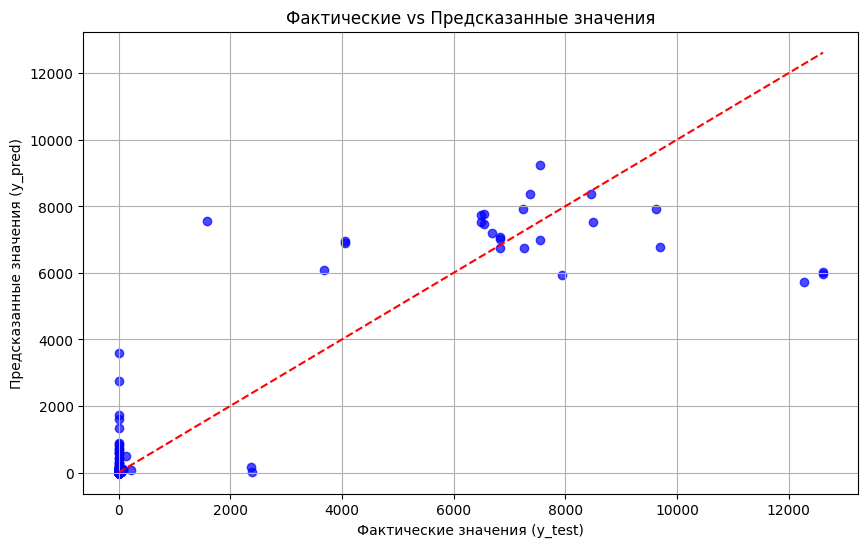

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop(columns=['yield_fact'])  # Все столбцы, кроме yield_fact
y = df['yield_fact']  # Целевая переменная

# 2. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Создание и обучение модели
# Можно использовать линейную регрессию или случайный лес
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# 5. Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

# 6. Визуализация предсказаний
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Фактические значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.title('Фактические vs Предсказанные значения')
plt.grid(True)
plt.show()